In [1]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import model_predict
import pickle
import sys, itertools

In [2]:
series, scaler = model_predict.read_data_series(scale=True, filter_early=False)

In [3]:
'''def test_stationarity(timeseries):
	dftest = adfuller(timeseries, autolag='AIC')
	print(f'ADF Statistic: {dftest[0]}')
	print(f'p-value: {dftest[1]}')
	plt.plot(timeseries)
	plt.show()
test_stationarity(np.diff(data, 2))
plot_acf(data, lags=30)
plot_pacf(data, lags=30)'''

"def test_stationarity(timeseries):\n\tdftest = adfuller(timeseries, autolag='AIC')\n\tprint(f'ADF Statistic: {dftest[0]}')\n\tprint(f'p-value: {dftest[1]}')\n\tplt.plot(timeseries)\n\tplt.show()\ntest_stationarity(np.diff(data, 2))\nplot_acf(data, lags=30)\nplot_pacf(data, lags=30)"

In [3]:
results = pickle.load(open('results.pkl', 'rb'))

results.sort(key=lambda x: x[2])
print('Best:', results[4])

Best: ((2, 1, 3), (1, 2, 1, 12), 555.4876400860102)


In [4]:
# 拟合 SARIMA 模型
# order = param_best  # AR 阶数为 1，差分阶数为 0，MA 阶数为 1
order = (2, 1, 3)
seasonal_order = (1, 2, 1, 12)  # 季节性部分：季节 AR 阶数为 1，差分阶数为 0，季节 MA 阶数为 1，季节周期为 12 (假设数据是按月季节性的)
model = SARIMAX(series, order=order, seasonal_order=seasonal_order)  # 创建 SARIMA 模型对象
results = model.fit()  # 拟合模型，估计模型参数

# 输出模型拟合结果
print(results.summary())

C:\Users\h1318\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  117
Model:             SARIMAX(2, 1, 3)x(1, 2, [1], 12)   Log Likelihood                -121.324
Date:                              Mon, 29 Jul 2024   AIC                            258.647
Time:                                      14:09:46   BIC                            278.822
Sample:                                  01-31-2011   HQIC                           266.790
                                       - 09-30-2020                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5601      0.172     -3.264      0.001      -0.896      -0.224
ar.L2         -0.92

MSE: 836.76
MAE: 25.27
R^2: 0.27
MAPE: 0.58


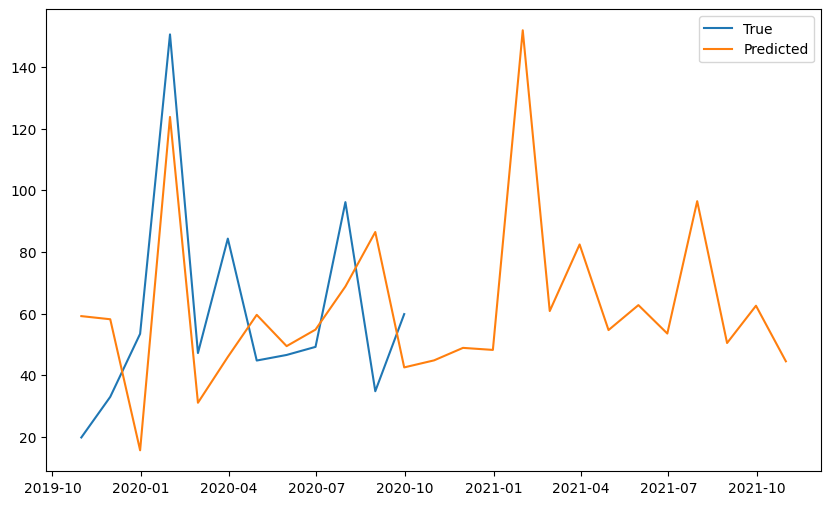

2019-10-31     59.160963
2019-11-30     58.145874
2019-12-31     15.631923
2020-01-31    123.788585
2020-02-29     31.048993
2020-03-31     45.915972
2020-04-30     59.576130
2020-05-31     49.425305
2020-06-30     54.788965
2020-07-31     68.777275
2020-08-31     86.451593
2020-09-30     42.522776
2020-10-31     44.807388
2020-11-30     48.857891
2020-12-31     48.197080
2021-01-31    151.908137
2021-02-28     60.808415
2021-03-31     82.413707
2021-04-30     54.636043
2021-05-31     62.731219
2021-06-30     53.505671
2021-07-31     96.460004
2021-08-31     50.434699
2021-09-30     62.533523
2021-10-31     44.500038
Freq: M, dtype: float64

In [6]:
import model_predict
import importlib
importlib.reload(model_predict)
model_predict.predict_to_future_arima(results, series, scaler, last_months=12)